Since our group metric is safety, I chose two datasets to look at- arrest data and firearm seizure data. 

Arrest data can give us a general idea of crime in an area, but may be skewed by the level of crime. In particular, there are hundreds of different crimes recorded in this dataset, and it would be difficult to "rank" the crimes. Instead, I chose to view the overall trends in each neighborhood. Instead of just looking at which neighborhood has the "most crime", we can look at whether the crime rates in neighborhoods are high or low and increasing or decreasing at the same time.

This seems to be an appropriate way to analyze crime data, because crime is so variable and intertwined with social factors.

In [83]:
#import packages
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar, geom_line
import datetime

In [84]:
#read in arrest data
arrest_data = pd.read_csv("arrest-data.csv")

In [85]:
#convert long date string into just the year so we can easily sort and graph
for index, row in arrest_data.iterrows():
    year = int(row["ARRESTTIME"][:4])
    arrest_data.loc[index,"ARRESTTIME"] = year

In [86]:
#sort by arrest year
sorted_arrests_by_date = arrest_data.sort_values(["ARRESTTIME"], ascending=False)
sorted_arrests_by_date.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
58321,2052033,22097280,49.0,M,B,2022,"600 Block First AV Pittsburgh, PA 15219",2701 Simple Assault.,"7200 Block Frankstown AV Pittsburgh, PA 15208",Homewood North,5,1302.0,9.0,2.0,-79.896270,40.457389
54890,2047010,22028003,16.0,F,B,2022,"600 Block 1ST AV PITTSBURGH, PA 15219","2701(a)(1) Simple Assault - Intent., Know., Re...","500 Block N HIGHLAND AV PITTSBURGH, PA 15206",Shadyside,5,708.0,8.0,2.0,-79.924945,40.453011
54873,2046955,22047498,34.0,M,W,2022,"S Fairmount ST & Roup AV Pittsburgh, PA 15232",503.04 Traffic Control Devices / 3802(a)(1) DU...,"S Fairmount ST & Roup AV Pittsburgh, PA 15232",Friendship,5,807.0,7.0,2.0,-79.935493,40.459339
54874,2046956,22047500,29.0,M,B,2022,"600 Block 1st AV Pittsburgh, PA 15219",5505 Public Drunkenness / 5503(a)(1) DISORDERL...,"1700 Block E Carson ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.981872,40.428593
54875,2046957,22047598,33.0,F,B,2022,"800 Block Proctor WY Pittsburgh, PA 15210",2701 Simple Assault.,"800 Block Proctor WY Pittsburgh, PA 15210",Allentown,3,1803.0,3.0,5.0,-79.993673,40.420400


In [87]:
#group by year and neighborhood, get number of arrests per year per neighborhood
sorted_arrests_by_date = sorted_arrests_by_date.groupby(by=["ARRESTTIME","INCIDENTNEIGHBORHOOD"]).size()

In [88]:
#view data
sorted_arrests_by_date.head(15)

ARRESTTIME  INCIDENTNEIGHBORHOOD     
1998        Central Business District    1
2007        Homewood South               1
            Spring Hill-City View        1
            Westwood                     1
2008        Greenfield                   1
2010        Central North Side           2
2011        East Liberty                 1
            South Side Flats             1
2012        Carrick                      1
            East Liberty                 1
2013        Beechview                    1
            Mount Washington             1
            Upper Hill                   1
2014        Beechview                    7
            Bloomfield                   1
dtype: int64

In [89]:
#convert into a more graphable form by creating a count column
test_test = sorted_arrests_by_date.reset_index()
test_test["count"] = test_test[0]
test_test.pop(0)
test_test.head(15)

,ARRESTTIME,INCIDENTNEIGHBORHOOD,count
0,1998,Central Business District,1
1,2007,Homewood South,1
2,2007,Spring Hill-City View,1
3,2007,Westwood,1
4,2008,Greenfield,1
5,2010,Central North Side,2
6,2011,East Liberty,1
7,2011,South Side Flats,1
8,2012,Carrick,1
9,2012,East Liberty,1


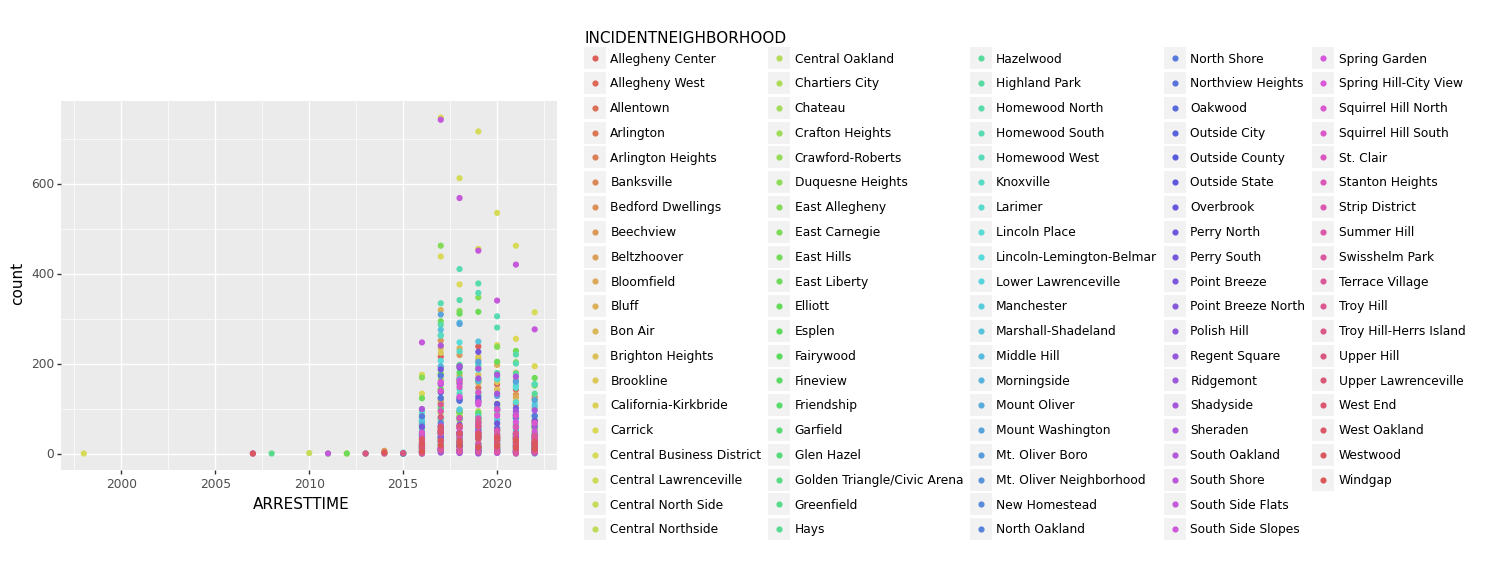

<ggplot: (8789662301760)>

In [90]:
#plot using plotnine
ggplot(test_test,aes(x="ARRESTTIME",y="count"))+geom_point(aes(color="INCIDENTNEIGHBORHOOD"))

Clearly, this visualization is too cluttered to gather any meaningful results. For these purposes, I will ignore the neighborhoods with a "normal" level of crime and focus on those with high and low crime rates.

In [91]:
#now want to step back, pick only the most relevant neighborhoods
#need to drop earlier years, pick only the top 15 neighborhoods with most crimes total
crime_ridden_neighborhoods = arrest_data.groupby("INCIDENTNEIGHBORHOOD").size().reset_index().sort_values(by=0,ascending=False).head(15)

In [92]:
crime_ridden_neighborhoods = crime_ridden_neighborhoods.reset_index()

In [93]:
#again, convert into a more graphable form
crime_ridden_neighborhoods.head()

,index,INCIDENTNEIGHBORHOOD,0
0,16,Central Business District,3570
1,78,South Side Flats,3053
2,15,Carrick,2102
3,26,East Allegheny,1893
4,43,Homewood South,1863


In [94]:
#make a list of the 15 neighborhoods with the most crime recorded
crime_neighborhood_list = list(crime_ridden_neighborhoods["INCIDENTNEIGHBORHOOD"])

In [95]:
#only use data points coming from those high crime neighborhoods
new_test_test = test_test[test_test["INCIDENTNEIGHBORHOOD"].isin(crime_neighborhood_list)]

In [98]:
#due to low number of data points from before 2016, get rid of them so we can visualize recent trend
final_test_test = new_test_test[new_test_test["ARRESTTIME"] >= 2016]

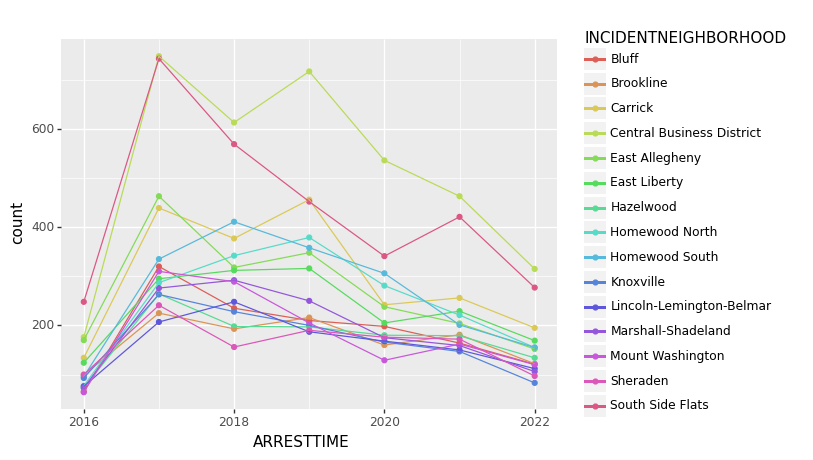

<ggplot: (8789656754999)>

In [99]:
#graph crime trends of 15 highest crime neighborhoods
ggplot(final_test_test,aes(x="ARRESTTIME",y="count"))+geom_point(aes(color="INCIDENTNEIGHBORHOOD"))+geom_line(aes(group="INCIDENTNEIGHBORHOOD",color="INCIDENTNEIGHBORHOOD"))

Looking at the highest crime neighborhoods, we can see there are at least 15 neighborhoods with 100 arrests per year or more. In particular, the central business district and the South Side Flats have extraordinarily high numbers of arrests. This won't tell us the "best neighborhood", but it can help us rule out many neighborhoods. 

One interesting thing to note is the sharp decline in arrests since 2019, the beginning of the pandemic.

In [ ]:
#now, let's do the same thing with the lowest crime neighborhoods

In [147]:
crime_free_neighborhoods = arrest_data.groupby("INCIDENTNEIGHBORHOOD").size().reset_index().sort_values(by=0,ascending=True).head(20)

In [148]:
crime_free_neighborhoods = crime_free_neighborhoods.reset_index()

In [149]:
crime_free_neighborhoods.head()

,index,INCIDENTNEIGHBORHOOD,0
0,57,Mt. Oliver Neighborhood,2
1,91,Troy Hill-Herrs Island,6
2,56,Mt. Oliver Boro,18
3,19,Central Northside,23
4,73,Ridgemont,32


In [150]:
crime_free_neighborhood_list = list(crime_free_neighborhoods["INCIDENTNEIGHBORHOOD"])

In [151]:
crime_free_df = test_test[test_test["INCIDENTNEIGHBORHOOD"].isin(crime_free_neighborhood_list)]

In [154]:
crime_free_df_final = crime_free_df[(crime_free_df["ARRESTTIME"] >= 2016) & (crime_free_df["count"]<80)]

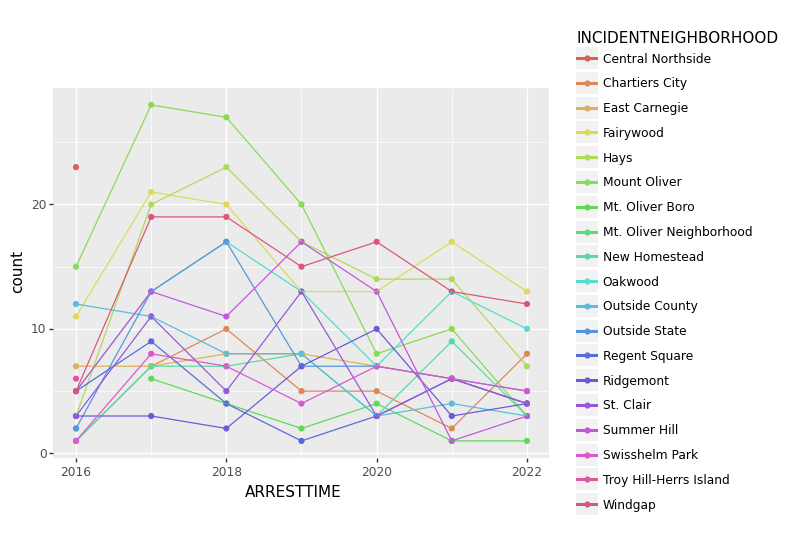

<ggplot: (8789665596504)>

In [155]:
ggplot(crime_free_df_final,aes(x="ARRESTTIME",y="count"))+geom_point(aes(color="INCIDENTNEIGHBORHOOD"))+geom_line(aes(group="INCIDENTNEIGHBORHOOD",color="INCIDENTNEIGHBORHOOD"))

While this may look incomprehensible, the details don't matter as much as the scale. For any of these 20 neighborhoods, there have not been more than 25 arrests in a year in the last 6 years. If a neighborhood has only about 2 arrests per month or fewer on average, we can confidently say it is safe.

Now, let's switch datasets and look at the firearm dataset instead. We can look for similarities and differences and maybe learn something about the type of crime prevalent in different areas.

In [100]:
#read in second dataset
firearm_data = pd.read_csv("firearmdata.csv")


In [101]:
#view structure of data
firearm_data.head()

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


In [105]:
#get number of guns seized per neighborhood per year
grouped_firearms = firearm_data.groupby(["year","neighborhood"])["total_count"].sum()

In [106]:
#view new grouped data
grouped_firearms.head()

year  neighborhood     
2015  Allegheny Center      2
      Allegheny West        1
      Allentown             9
      Arlington            10
      Arlington Heights     5
Name: total_count, dtype: int64

In [107]:
#convert into graphable form with count as a column
new_grouped_firearms = grouped_firearms.reset_index()

In [108]:
#view new data so we can graph properly
new_grouped_firearms.head()

,year,neighborhood,total_count
0,2015,Allegheny Center,2
1,2015,Allegheny West,1
2,2015,Allentown,9
3,2015,Arlington,10
4,2015,Arlington Heights,5


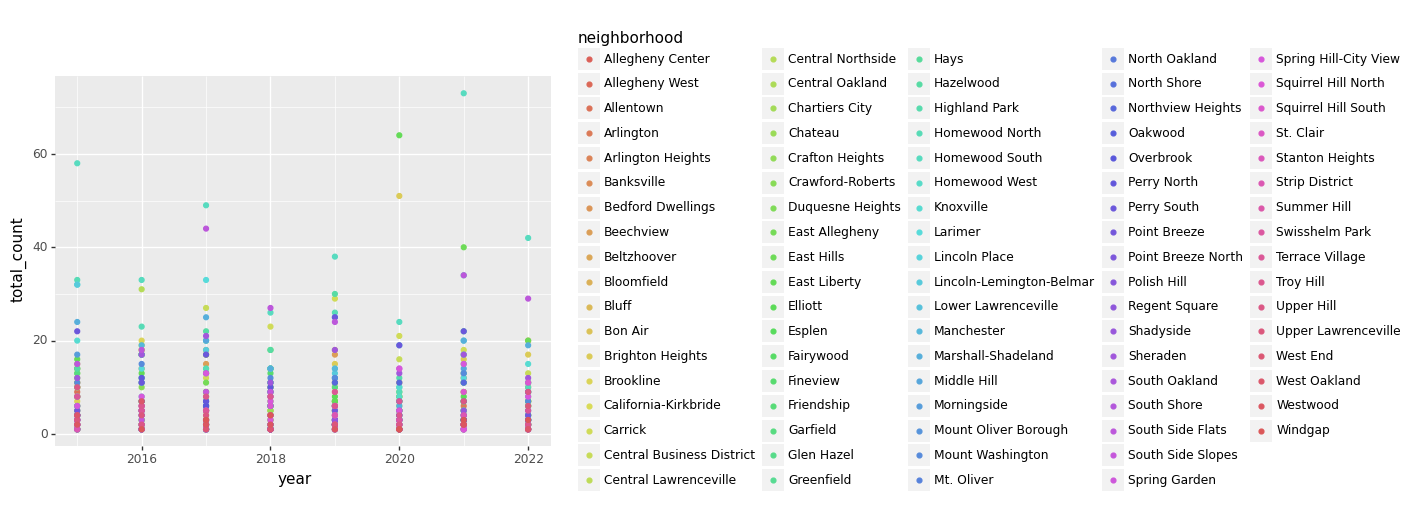

<ggplot: (8789655045145)>

In [109]:
#graph number of firearms seized per neighborhood per year
ggplot(new_grouped_firearms,aes(x="year",y="total_count"))+geom_point(aes(color="neighborhood"))

Looking at the firearm data, it is again difficult to see any meaningful trends, so we'll take the same approach and look at the neighborhoods on the extremes.

In [110]:
#group by neighborhood only and get total number of firearms seized in that neighborhood
most_gun_seizures = firearm_data.groupby("neighborhood")["total_count"].sum().reset_index()

In [112]:
#sort to get the neighborhoods with most guns seized
most_gun_seizures_sorted = most_gun_seizures.sort_values(by="total_count",ascending=False)

In [114]:
#isolate the neighborhoods with most gun seizures
most_gun_neighborhoods = most_gun_seizures_sorted.head(15)

In [116]:
#put those neighborhoods on a list
most_gun_neighborhood_list = list(most_gun_neighborhoods["neighborhood"])

In [117]:
#view list
most_gun_neighborhood_list

['Homewood South',
 'South Side Flats',
 'Homewood North',
 'Brighton Heights',
 'East Liberty',
 'Hazelwood',
 'Marshall-Shadeland',
 'Carrick',
 'Lincoln-Lemington-Belmar',
 'East Hills',
 'Perry South',
 'Larimer',
 'Central Business District',
 'Sheraden',
 'Knoxville']

In [119]:
#only use rows from high-seizure neighborhoods
most_gun_new_df = new_grouped_firearms[new_grouped_firearms["neighborhood"].isin(most_gun_neighborhood_list)]

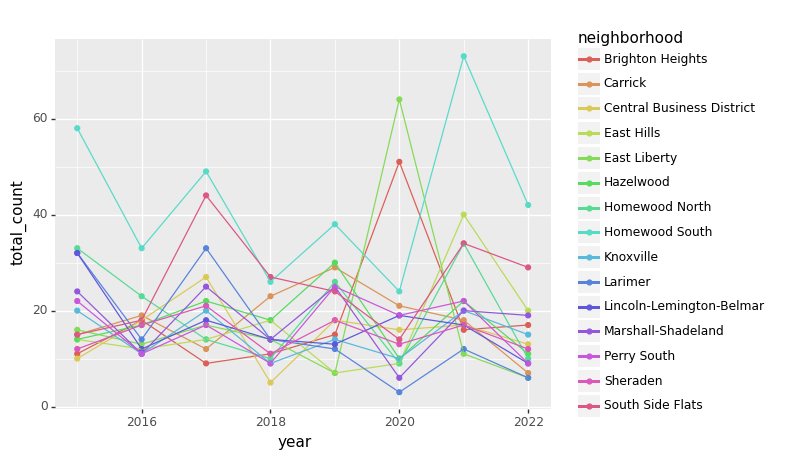

<ggplot: (8789661007797)>

In [120]:
#view trends of high-seizure neighborhoods
ggplot(most_gun_new_df,aes(x="year",y="total_count"))+geom_point(aes(color="neighborhood"))+geom_line(aes(group="neighborhood",color="neighborhood"))

In this graph, we can see that the scale is much smaller than we saw in the previous dataset. Even in the neighborhoods with the highest rates of firearm seizures, the average number of guns seized per month is 3 or fewer.

We can again suggest neighborhoods to avoid based on this graphic. Homewood, both north and south, stand out. However, we can also see a large spike in gun seizures in East Liberty and Brighton Heights in 2020. We can investigate this point:

In [180]:
firearm_data.sort_values(by="total_count",ascending=False).head(5)

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
3213,"300 BLOCK S NEGLEY AVE PITTSBURGH, PA 15206",55,0,30,0,22,3,2020,9,2,East Liberty,9.0,11.0,4.200311e+10,2.0,5,3-8,40.465663,-79.929123
3205,"1800 BLOCK FAIRLEE ST PITTSBURGH, PA 15212",44,3,19,0,17,5,2020,9,1,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479008,-80.041643
2417,"1000 BLOCK SOUTH SIDE AVE PITTSBURGH, PA 15212",29,0,4,3,15,7,2019,2,2,NaN,NaN,NaN,4.200356e+10,NaN,1,3-21,40.440090,-79.880204
132,"700 BLOCK N HOMEWOOD AVE PITTSBURGH, PA 15208",24,0,10,6,3,5,2015,4,1,Homewood South,9.0,13.0,4.200313e+10,2.0,5,3-17,40.455629,-79.896675
526,"1600 BLOCK WORTHINGTON ST PITTSBURGH, PA 15206",19,1,12,2,3,1,2015,11,6,Lincoln-Lemington-Belmar,9.0,12.0,4.200356e+10,2.0,5,3-18,40.468372,-79.891701


As we can see, these spikes were due to two individuals who had 55 and 44 guns seized, respectively. This demonstrates an important point about the variability of data and the importance of not drawing large conclusions from small amounts of data.

In [156]:
fewest_gun_seizures_sorted = most_gun_seizures.sort_values(by="total_count",ascending=True)

In [173]:
fewest_gun_neighborhoods = fewest_gun_seizures_sorted.head(20)

In [174]:
fewest_gun_neighborhood_list = list(fewest_gun_neighborhoods["neighborhood"])

In [175]:
fewest_gun_neighborhood_list

['Swisshelm Park',
 'Summer Hill',
 'Mt. Oliver',
 'Regent Square',
 'Chartiers City',
 'Oakwood',
 'Friendship',
 'West End',
 'St. Clair',
 'Hays',
 'Mount Oliver Borough',
 'Fairywood',
 'Westwood',
 'Lincoln Place',
 'Esplen',
 'Banksville',
 'Arlington Heights',
 'Polish Hill',
 'Spring Garden',
 'Bon Air']

In [176]:
fewest_gun_new_df = new_grouped_firearms[new_grouped_firearms["neighborhood"].isin(fewest_gun_neighborhood_list)]

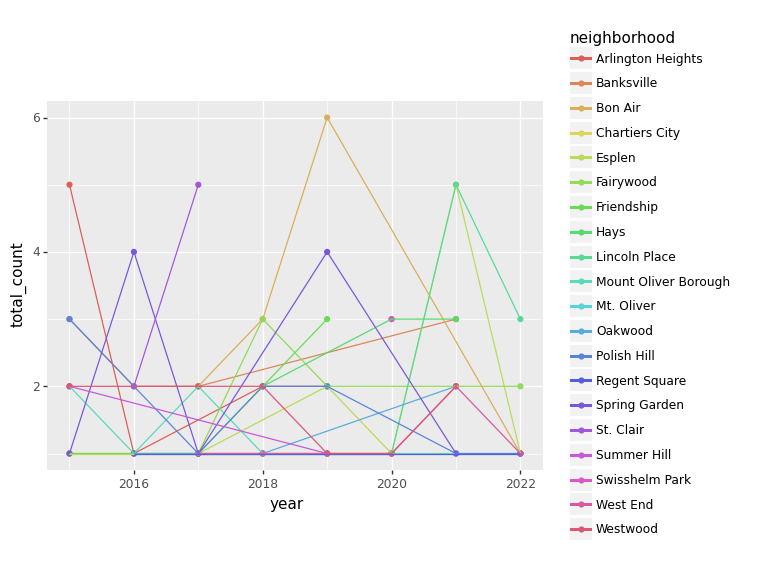

<ggplot: (8789653654791)>

In [177]:
ggplot(fewest_gun_new_df,aes(x="year",y="total_count"))+geom_point(aes(color="neighborhood"))+geom_line(aes(group="neighborhood",color="neighborhood"))

Again, we don't have to look at individual trends to gain insight from this graph. We can see that there are at least 20 neighborhoods with 6 or fewer gun seizures per year. In addition, many of these neighborhoods have gaps in their trends due to years without any seizures. This is certainly a positive indicator for those seeking neighborhoods with low rates of gun violence.